In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
true_df=pd.read_csv(r"C:\Shweta\Kaggle Notebooks\Naive Bayes Fake News Classifier\True.csv")
fake_df=pd.read_csv(r"C:\Shweta\Kaggle Notebooks\Naive Bayes Fake News Classifier\Fake.csv")

In [5]:
true_df.head(2)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"


In [6]:
fake_df.head(2)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"


In [7]:
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [8]:
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [9]:
print(f"Missing Values in true data: \n{true_df.isna().sum()}")
print(f"Missing Values in fake data: \n{fake_df.isna().sum()}")

Missing Values in true data: 
title      0
text       0
subject    0
date       0
dtype: int64
Missing Values in fake data: 
title      0
text       0
subject    0
date       0
dtype: int64


In [10]:
print(f"Duplicate Values in true data: \n{true_df.duplicated().sum()}")
print(f"Duplicate Values in fake data: \n{fake_df.duplicated().sum()}")

Duplicate Values in true data: 
206
Duplicate Values in fake data: 
3


In [11]:
# Dropping the duplicates in both datasets
true_df.drop_duplicates(keep="last",inplace=True)
fake_df.drop_duplicates(keep="last",inplace=True)

In [12]:
print(f"Duplicate Values in true data: \n{true_df.duplicated().sum()}")
print(f"Duplicate Values in fake data: \n{fake_df.duplicated().sum()}")

Duplicate Values in true data: 
0
Duplicate Values in fake data: 
0


Let us add the column 'label' to classify the news as True and Fake.Further, merge the two dataframes for further analysis and modelling

In [13]:
true_df['label']='true'
fake_df['label']='fake'

In [14]:
final_df=pd.concat([true_df,fake_df],axis=0,ignore_index=True)

In [15]:
# removing the duplicates if any
final_df.drop_duplicates(inplace=True)
# shuffling the records to get a random mix of records in training and testing datasets
final_df = final_df.sample(frac=1).reset_index(drop=True)

In [16]:
final_df.head()

,title,text,subject,date,label
0,Conservative Christians Think Girls Are A Cro...,Likening girls to common crops that should be ...,News,"February 15, 2016",fake
1,Obama’s Response To 8-Year-Old Girl In Flint ...,"Yesterday, an eight-year-old girl from Flint, ...",News,"April 28, 2016",fake
2,VIOLENT LEFT EXPOSED: Anti-Trump Latino Sprays...,This is what it looks like when the tolerant ...,left-news,"Apr 27, 2016",fake
3,Twitter LAYS INTO GOP Leaders Over Amazingly ...,When Khizr Khan took the stage at the DNC to g...,News,"July 31, 2016",fake
4,Hungary calls EU court's refugee ruling 'appal...,BUDAPEST (Reuters) - Hungary said on Wednesday...,worldnews,"September 6, 2017",true


In [17]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44689 entries, 0 to 44688
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44689 non-null  object
 1   text     44689 non-null  object
 2   subject  44689 non-null  object
 3   date     44689 non-null  object
 4   label    44689 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [18]:
final_df.describe(include=['object','int64'])

,title,text,subject,date,label
count,44689,44689,44689,44689,44689
unique,38729,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 6, 2017",fake
freq,14,627,11220,166,23478


In [19]:
final_df['subject'].value_counts()

politicsNews       11220
worldnews           9991
News                9050
politics            6838
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [20]:
# Step 1: Remove problematic entries like URLs
final_df = final_df[~final_df['date'].str.contains('http', na=False)]

# Step 2: Strip any extra whitespace
final_df['date'] = final_df['date'].str.strip()

# Step 3: Convert to datetime, with error handling
final_df['date'] = pd.to_datetime(final_df['date'], errors='coerce')

# Step 4 (Optional): Drop rows where date couldn’t be parsed
final_df = final_df.dropna(subset=['date'])


In [21]:
final_df['dayofweek']=final_df['date'].dt.dayofweek

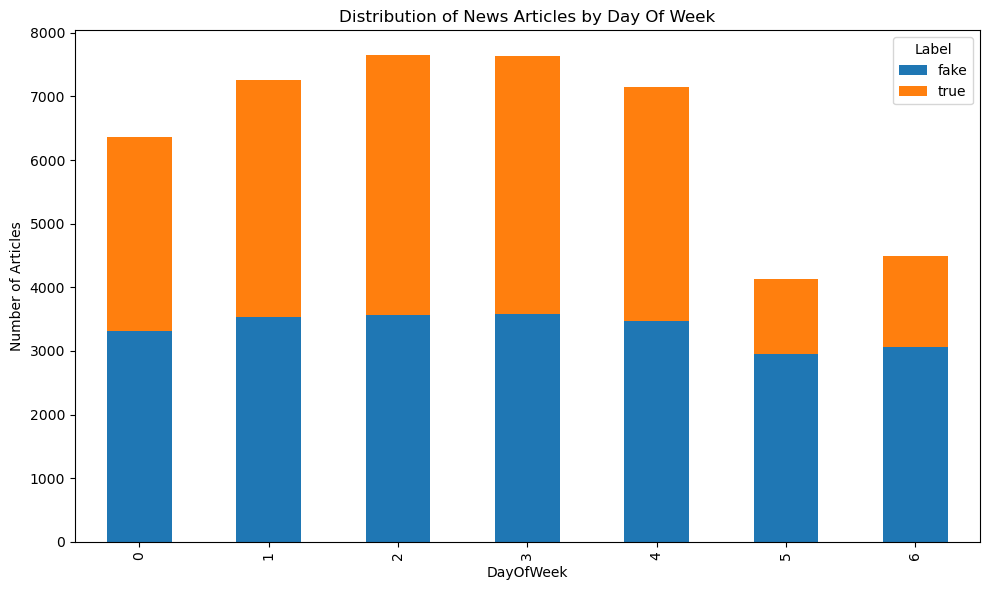

In [22]:
# Plot
stacked_data=pd.crosstab(final_df['dayofweek'],final_df['label'])
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Distribution of News Articles by Day Of Week')
plt.xlabel('DayOfWeek')
plt.ylabel('Number of Articles')
plt.legend(title='Label')
plt.tight_layout()
plt.show()

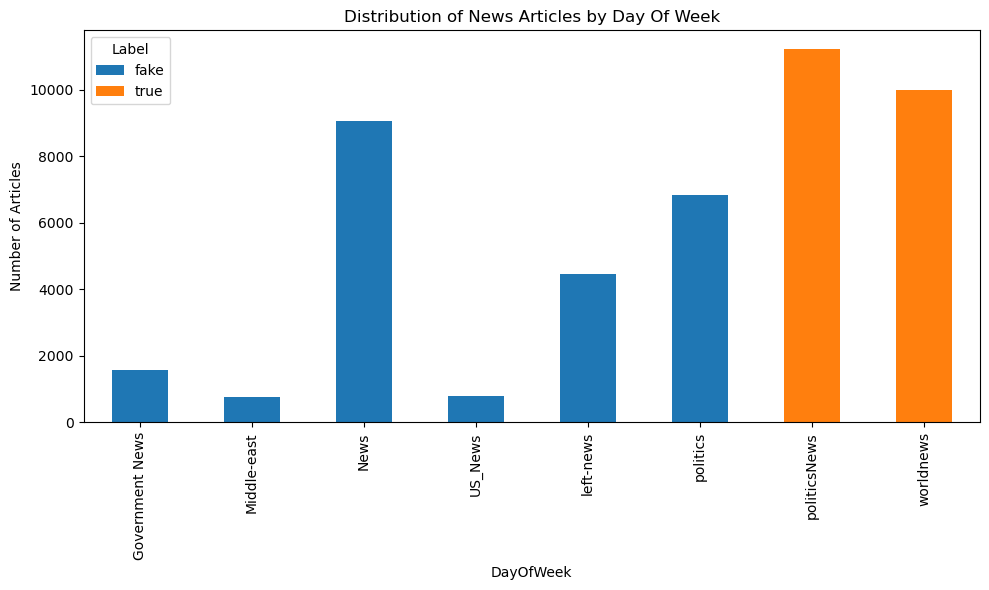

In [23]:
stacked_data_sub=pd.crosstab(final_df['subject'],final_df['label'])
stacked_data_sub.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Distribution of News Articles by Day Of Week')
plt.xlabel('DayOfWeek')
plt.ylabel('Number of Articles')
plt.legend(title='Label')
plt.tight_layout()
plt.show()

In [24]:
#Encoding of target
final_df['label']=final_df['label'].map({'fake':1,'true':0})

In [25]:
# Step 1: Compute mean label per subject
subject_map = final_df.groupby('subject')['label'].mean()

# Step 2: Assign mapped values back to original DataFrame
final_df['subject_num'] = final_df['subject'].map(subject_map)

In [26]:
import re, nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhi0\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\abhi0\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhi0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
stpwrd_eng = stopwords.words("english")

In [28]:
def clean_message(s):
    # lower casing
    s=s.lower()
    # remove punctuations
    s=re.sub('[^\w\s]',"",s)
    # removing stopwords
    s=word_tokenize(s)
    s=[w for w in s if w not in stpwrd_eng]
    
    s=" ".join(s)
    return s

In [29]:
final_df['title']=final_df['title'].apply(clean_message)
final_df['text']=final_df['text'].apply(clean_message)

In [30]:
final_df['combined_text']=final_df['text']+' '+final_df['title']

In [31]:
from sklearn.model_selection import train_test_split
X_train_raw,X_test_raw,y_train,y_test=train_test_split(final_df[['combined_text', 'subject_num', 'dayofweek']],final_df['label'],test_size=0.2,random_state=42)

In [32]:
#Count Vectorization
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_text  = vectorizer.fit_transform(X_train_raw['combined_text'])
X_test_text  = vectorizer.transform(X_test_raw['combined_text'])

In [33]:
#combine token text columns with categorical columns
from scipy.sparse import hstack

X_train = hstack([X_train_text, np.array(X_train_raw[['subject_num', 'dayofweek']])])
X_test = hstack([X_test_text, np.array(X_test_raw[['subject_num', 'dayofweek']])])

In [34]:
#train the multinomial naive bayes model
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train,y_train)
mnb.score(X_test,y_test)

0.9681065353625783

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred=mnb.predict(X_test)
print("Evaluation Metrics are:")
print(f"Accuracy:{round(accuracy_score(y_test,y_pred),4)}")
print(f"Precision:{round(precision_score(y_test,y_pred),4)}")
print(f"Recall:{round(recall_score(y_test,y_pred),4)}")
print(f"F1 Score:{round(f1_score(y_test,y_pred),4)}")

Evaluation Metrics are:
Accuracy:0.9681
Precision:0.9677
Recall:0.972
F1 Score:0.9698


#### Vectorization using TfidfVectorizer

In [36]:
#Count Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000,stop_words='english')
X_train_text  = vectorizer.fit_transform(X_train_raw['combined_text'])
X_test_text  = vectorizer.transform(X_test_raw['combined_text'])

In [37]:
#combine token text columns with categorical columns
from scipy.sparse import hstack

X_train = hstack([X_train_text, np.array(X_train_raw[['subject_num', 'dayofweek']])])
X_test = hstack([X_test_text, np.array(X_test_raw[['subject_num', 'dayofweek']])])

#### Hyperparameter Tuning using Cross Validation

In [38]:
#train the multinomial naive bayes model
from sklearn.model_selection import GridSearchCV

# Base model
model=MultinomialNB()

# Parameter grid
param_grid={'alpha':[0.0,0.5,1.0,2.0,5.0]}

# GridSearchCV setup
grid=GridSearchCV(model,param_grid,cv=5,scoring='f1',verbose=1,n_jobs=-1)

# Fit on training data
grid.fit(X_train,y_train)

# Evaluate
print(f"Best Parameters are :{grid.best_params_}")
print(f"Best Score is (cross-validated) :{grid.best_score_}")  
print(f"Test Accuracy :{grid.score(X_test,y_test)}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters are :{'alpha': 5.0}
Best Score is (cross-validated) :0.9857835462497821
Test Accuracy :0.9856709549210333


In [39]:
mnb1 = MultinomialNB(alpha=5.0)
mnb1.fit(X_train,y_train)
mnb1.score(X_test,y_test)

0.9846687555953447

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the test set
y_pred=mnb1.predict(X_test)

#Evaluation metrics
print("Evaluation Metrics are:")
print(f"Accuracy:{round(accuracy_score(y_test,y_pred),4)}")
print(f"Precision:{round(precision_score(y_test,y_pred),4)}")
print(f"Recall:{round(recall_score(y_test,y_pred),4)}")
print(f"F1 Score:{round(f1_score(y_test,y_pred),4)}")

Evaluation Metrics are:
Accuracy:0.9847
Precision:0.9717
Recall:1.0
F1 Score:0.9857


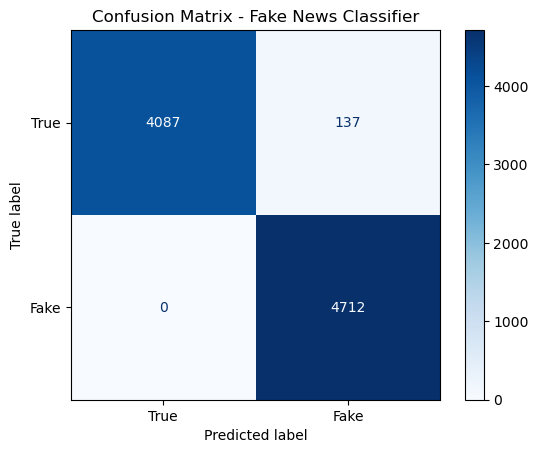

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

print(classification_report(y_test, y_pred, target_names=['True', 'Fake']))


# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # 0 = true, 1 = fake

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['True', 'Fake'])
disp.plot(cmap='Blues', values_format='d')

plt.title('Confusion Matrix - Fake News Classifier')
plt.show()
